亚信科技 AsiaInfo

[*********************100%%**********************]  1 of 1 completed


---- Running the backtest... ----

---- Backtesting completed ----

Annualised Return (Geo): -0.07133970550372914
Avg Annual Return (Ari): -0.029806232718584173
Volatility (Std): 0.4049204259094756
Sharpe Ratio: -0.176182037108886
Downside Volatility: 0.2737885425005186
Sortino Ratio: -0.2605649778189459
VaR 99: -0.060770973182408594
VaR 99 (Year): -0.3586194649450278
CVaR 99: -0.08457911949010613
CVaR 99 (Year): -0.3586194649450278
Initial Value: 7.847164630889893
Peak Value: 13.204915046691895
Final Value: 5.21999979019165
Max Drawdown: 0.6569459028103927
Avg Drawdown: 0.19214309417314976
Calmar Ratio: -0.10859296815542994
Sterling Ratio: -0.3712842546370226
Monthly Stats: 
      count      mean       std       min       25%       50%       75%  \
Date                                                                      
1       6.0  0.001622  0.109565 -0.164706 -0.063583  0.040042  0.059301   
2       6.0  0.027746  0.094381 -0.068790 -0.051786  0.011574  0.110681   
3       6.0 -0.

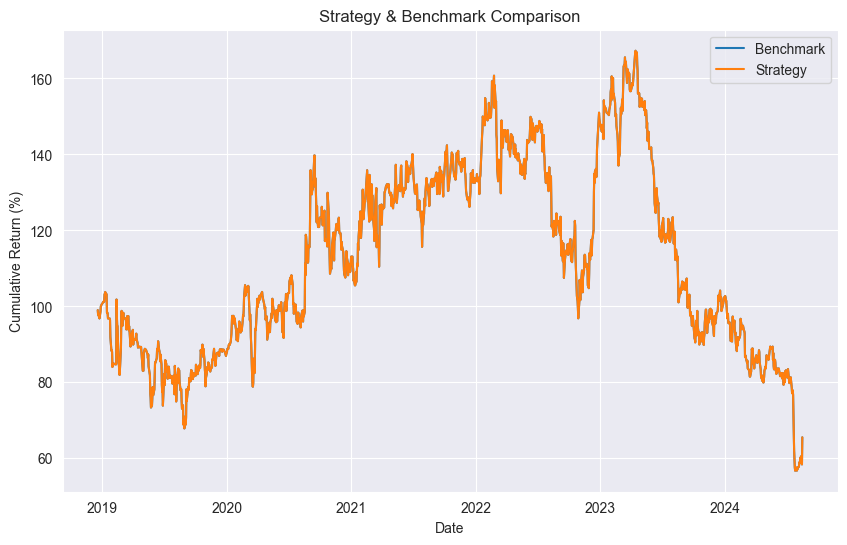

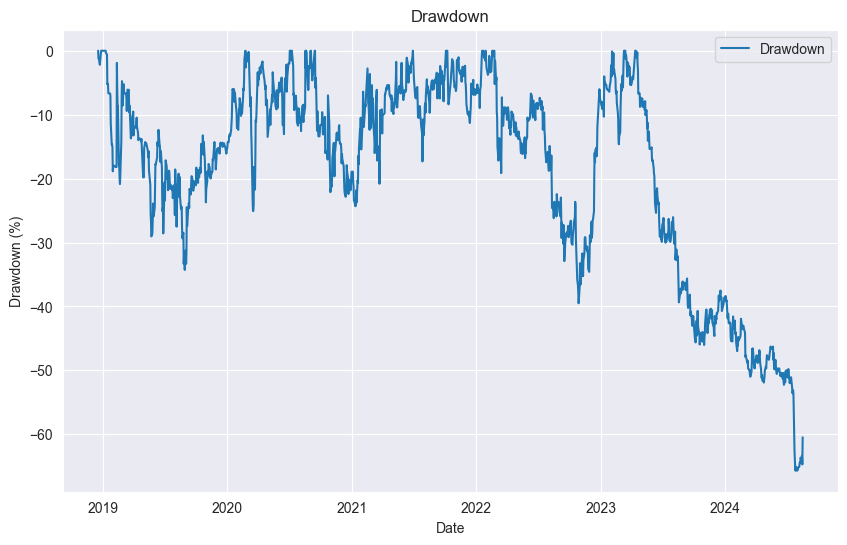

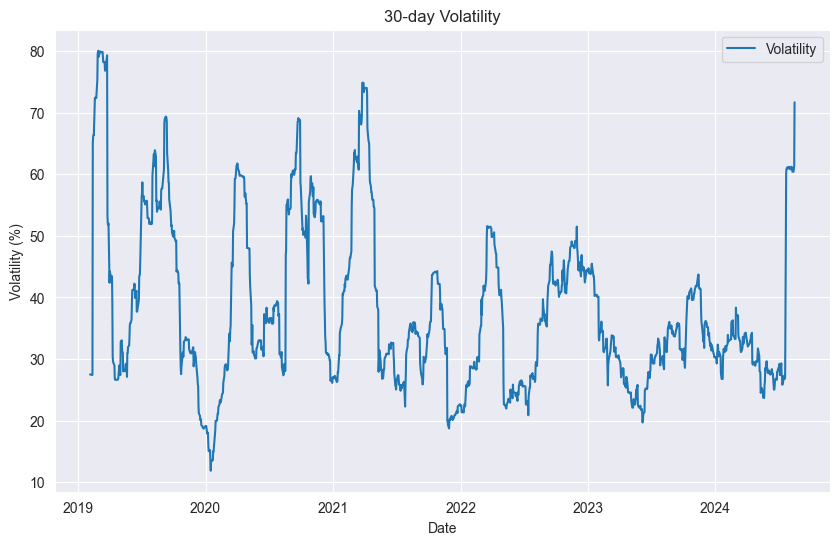

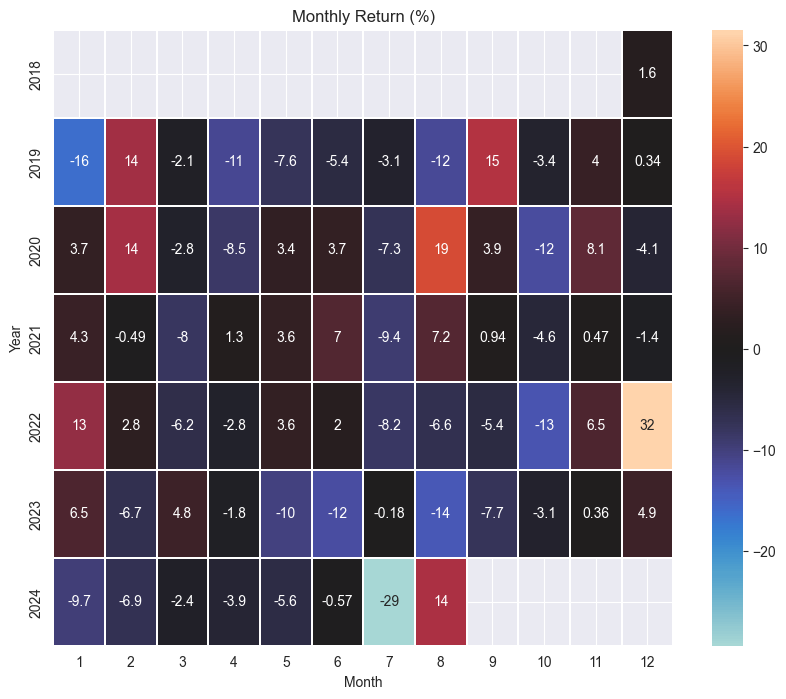

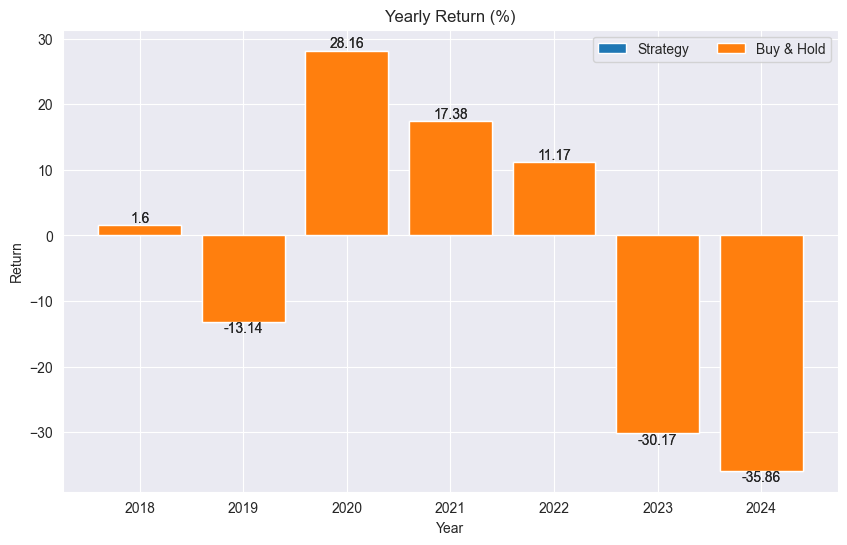

In [1]:
from datetime import datetime
from finance_utils.backtest import Backtest
from finance_utils.utils import *
import yfinance as yf
import pandas as pd

start_date = '2000-01-01'
df = yf.download('1675.HK', start=start_date)

df_new = pd.DataFrame()
df_new['Price'] = df['Adj Close']
df_new['Value'] = df['Adj Close']
df_new['Return'] = df['Adj Close'].pct_change()

test_1675 = Backtest(df_new)

In [2]:
df_monthly = test_1675.results['Monthly Return']
# set time here
today = datetime.now()
last_10_years = f'{today.year - 9}-01-01'
last_20_years = f'{today.year - 19}-01-01'
start_date = f'1900-01-01'
choices = [last_10_years, last_20_years, start_date]

In [3]:
monthly_df = pd.DataFrame(test_1675.results['Monthly Return'].copy())
monthly_stats = monthly_df.groupby(monthly_df.index.month).describe()['Monthly Return']
monthly_stats.index.name = 'Month'
monthly_stats = monthly_stats * 100
monthly_stats['count'] /= 100
monthly_stats['mean / std'] = monthly_stats['mean'] / monthly_stats['std']
monthly_stats

,count,mean,std,min,25%,50%,75%,max,mean / std
Month,,,,,,,,,
1,6.0,0.162238,10.956537,-16.470579,-6.358343,4.004166,5.930132,12.676068,0.014807
2,6.0,2.774556,9.438087,-6.878983,-5.178582,1.157387,11.068105,14.130439,0.293974
3,6.0,-2.806401,4.401505,-8.000011,-5.393712,-2.636912,-2.174758,4.768781,-0.637600
4,6.0,-4.514469,4.638419,-11.368416,-7.372536,-3.359649,-2.029050,1.296583,-0.973277
5,6.0,-2.135118,6.326905,-10.101505,-7.095279,-1.113716,3.503291,3.565071,-0.337466
6,6.0,-0.932579,6.938121,-12.238323,-4.208476,0.697106,3.234085,7.012559,-0.134414
7,6.0,-9.579565,10.279452,-29.351644,-9.073074,-7.733020,-4.151847,-0.181824,-0.931914
8,6.0,1.486151,14.016589,-13.783793,-10.306738,0.301586,12.658949,19.162300,0.106028
9,5.0,1.416191,9.029233,-7.676134,-5.357148,0.940426,3.938358,15.235454,0.156845
